In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
import numpy as np
from scipy import misc
from PIL import Image
from PIL import ImageOps

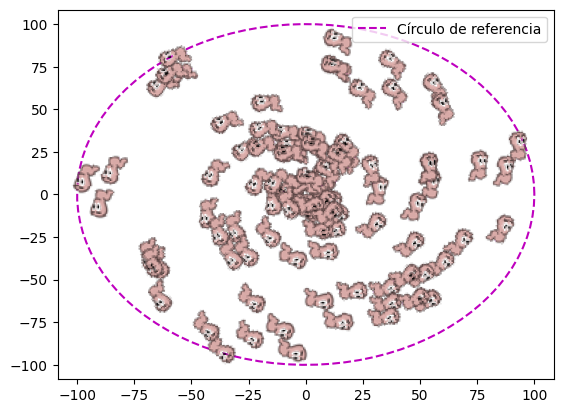

In [63]:
# Definir una función para eliminar el fondo no deseado
def remove_background(image_path):
    img = Image.open(image_path)
    img = img.convert("RGBA")

    data = np.array(img)

    # Establecer píxeles no deseados como transparentes
    red, green, blue, alpha = data[:, :, 0], data[:, :, 1], data[:, :, 2], data[:, :, 3]
    mask = (red > 200) & (green > 200) & (blue > 200) & (alpha > 200)
    data[:, :, :4][mask] = [255, 255, 255, 0]

    img = Image.fromarray(data)
    return img

# Generar los puntos aleatorios
num_worms = 100
angles = np.random.uniform(0, 2 * np.pi, num_worms)
distances = np.random.uniform(1, 100, num_worms)
x = distances * np.cos(angles)
y = distances * np.sin(angles)

# # Cargar y ajustar la imagen del worm
worm_image = remove_background('png-clipart-worms-game-worms-game.png')

# Voltear horizontalmente la imagen del gusano
worm_image_flipped = ImageOps.mirror(worm_image)

# Redimensionar la imagen del worm
image_width = 0.05  # Ancho deseado de la imagen en el gráfico
worm_image_resized = worm_image_flipped.resize((int(worm_image.width * image_width), int(worm_image.height * image_width)))

# Crear el gráfico
fig, ax = plt.subplots()

# Mostrar cada imagen del worm en lugar de los puntos
for xi, yi, angle in zip(x, y, angles):
    worm_rotated = worm_image_resized.rotate(np.degrees(angle))
    image_box = offsetbox.OffsetImage(worm_rotated)
    ab = offsetbox.AnnotationBbox(image_box, (xi, yi), frameon=False)
    ax.add_artist(ab)

# Generar el círculo de referencia
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = 100 * np.cos(theta)
y_circle = 100 * np.sin(theta)

# Agregar el círculo de referencia al gráfico
ax.plot(x_circle, y_circle, 'm--', label='Círculo de referencia')

# Establecer los límites del gráfico
max_distance = max(distances)
ax.set_xlim(-max_distance - 10, max_distance + 10)
ax.set_ylim(-max_distance - 10, max_distance + 10)

# Mostrar la leyenda y el gráfico
ax.legend(loc='upper right')
plt.show()

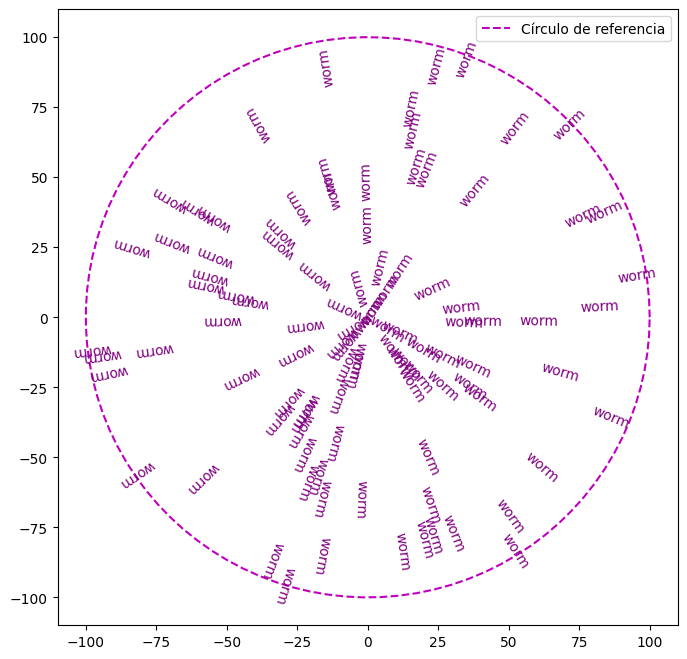

In [52]:
# Generar los puntos aleatorios
num_worms = 100
angles = np.random.uniform(0, 2 * np.pi, num_worms)
distances = np.random.uniform(1, 100, num_worms)
x = distances * np.cos(angles)
y = distances * np.sin(angles)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Mostrar cada "-" orientado con el ángulo correspondiente
for xi, yi, angle in zip(x, y, angles):
    plt.text(xi, yi, 'worm', color='purple', ha='center', va='center', fontsize=10, rotation=np.degrees(angle))

# Generar el círculo de referencia
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = 100 * np.cos(theta)
y_circle = 100 * np.sin(theta)

# Agregar el círculo de referencia al gráfico
ax.plot(x_circle, y_circle, 'm--', label='Círculo de referencia')

# Establecer los límites del gráfico
max_distance = max(distances)
ax.set_xlim(-max_distance - 10, max_distance + 10)
ax.set_ylim(-max_distance - 10, max_distance + 10)

# Mostrar la leyenda y el gráfico
ax.legend(loc='upper right')
plt.show()